# Laboratory #4_2 : Object Detection with YOLO

At the end of this laboratory, you would get familiarized with

*   Object Detection
*   YOLO for Object Detection using Keras and TensorFlow

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Add sufficient comments and explanations wherever necessary.
*   **Once you have the code completed, use GPU to train model faster.**

---

# YOLOv3 for Object Detection

*   There are several open source implementations of each version of YOLO.
*   For this exercise, we would not be implementing the YOLO from scratch as it is a challenging model and requires many customized elements.
*   We would use an open source implementation of YOLOv3 available from Python Lessons github repo, implemented with TensorFlow 2.x.
*   More details about YOLO can be found [here](https://pjreddie.com/darknet/yolo/). Refer the site and also the [paper](https://pjreddie.com/media/files/papers/YOLOv3.pdf) for better understanding.

## Clone the repo in the notebook

In [ ]:
from skimage import color, data, feature, filters, io, transform 
import matplotlib.pyplot as plt

In [ ]:
! git clone --recursive https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3.git


fatal: destination path 'TensorFlow-2.x-YOLOv3' already exists and is not an empty directory.


In [ ]:
# navigate to the cloned repository

%cd TensorFlow-2.x-YOLOv3/

/content/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3


In [ ]:
# installing additional requirements using pip

! pip install -r requirements.txt

# Please note that some libraries would return error. 
# If they are not important dependecies, you can skip those errors.
# Pip installation might require restarting the notebook. 
# Follow the installation output

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Loading pre-trained weights

*   Load the weights using any one of the methods

In [ ]:
#  download the weights to the filesystem 
# (Remember that this would not be persistent)
# If you need the weights to be persistent, upload the weights to your drive
# and load from the drive

! wget -P model_data https://pjreddie.com/media/files/yolov3.weights

--2022-11-22 16:45:29--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘model_data/yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  17.2MB/s    in 15s     

2022-11-22 16:45:45 (15.7 MB/s) - ‘model_data/yolov3.weights’ saved [248007048/248007048]



## Detecting objects in images

*   Run sample predictions using the pre-trained weights

In [ ]:
from yolov3.utils import detect_image, Load_Yolo_model
from yolov3.configs import *

image_path = "./IMAGES/kite.jpg"
output_path = "./kite_pred.jpg"

yolo = Load_Yolo_model()

kite_predictions = detect_image(
    yolo, 
    image_path, 
    output_path, 
    input_size=YOLO_INPUT_SIZE, 
    show=False, 
    rectangle_colors=(255,0,0))

# You will find the predictions file saved in the output path
# all objects present in MS-COCO classes would be detected in the saved file

GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Loading Darknet_weights from: model_data/yolov3.weights
1/1 [==============================] - 2s 2s/step


## Understanding Image Detection function

*   In this exercise, you have to write your own function for object detection (Each step would lead to replicating the existing function)

*   Load the input image and visualize the image using matplotlib
*   Please note that image read is different in matplotlib, skimage and opencv. You will need to do appropriate conversion if using opencv

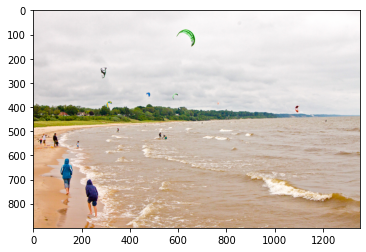

In [ ]:
# solution
image = io.imread('./IMAGES/kite.jpg')
plt.imshow(image)

*   Load the configurations

In [ ]:
# open the configs.py file to understand the different configuration parameters

from yolov3.configs import *

*   Load the pre-trained weights using the Load_Yolo_model fuction available in yolov3.utils

In [ ]:
from yolov3.utils import Load_Yolo_model

yolo = Load_Yolo_model()

GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Loading Darknet_weights from: model_data/yolov3.weights


*   Preprocess the image according to the network to be used

In [ ]:
import numpy as np
from yolov3.utils import image_preprocess

image_data = image_preprocess(np.copy(image), [YOLO_INPUT_SIZE, YOLO_INPUT_SIZE])
image_data = image_data[np.newaxis, ...].astype(np.float32)

print('Original image:', image.shape)
print('Processed image:', image_data.shape)

Original image: (900, 1352, 3)
Processed image: (1, 416, 416, 3)


### Prediction boxes

*   Predict bounding boxes using the predict method 

In [ ]:
pred_bbox = yolo.predict(image_data)

1/1 [==============================] - 1s 1s/step


*   Get the prediction statistics

In [ ]:
print('Length of the prediction boxes =', len(pred_bbox))
print('Shape of each prediction box ')

for i in range(len(pred_bbox)):
    print('Shape of prediction box', i, 'is', pred_bbox[i].shape)

Length of the prediction boxes = 3
Shape of each prediction box 
Shape of prediction box 0 is (1, 52, 52, 3, 85)
Shape of prediction box 1 is (1, 26, 26, 3, 85)
Shape of prediction box 2 is (1, 13, 13, 3, 85)


*   Why is the length of prediction boxes 3?

**Solution**

*   The length of the prediction boxes corresponds to the number of scales (3) in which the model performs the detection. As can be seen in the following illustration, there are 3 distinct detection layers (or prediction boxes), that execute the feature extraction in pyramids networks way. This way, the predictions of the previous boxes are utilised, in order to increase the classification accuracy of the subsequent ones.

    Image credits: https://www.researchgate.net/publication/339763978_Efficient_Foreign_Object_Detection_Between_PSDs_and_Metro_Doors_via_Deep_Neural_Networks

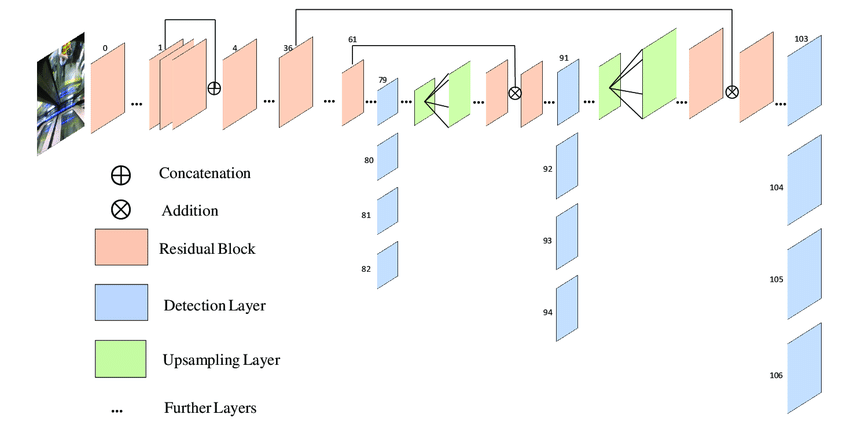

*   What does the shape of each prediction box represent?
*   Which layer corresponds to each prediction box output?

**Solution**

*   The output shape of each box (1, x, y, n, v) corresponds to:
    1. x -> the width of the cells into which the image is divided;
    2. y -> the length of the cells into which the image is divided; 
    3. n -> the number of channels (for example, an RGB image contains 3 channels);
    4. v -> is the concatenation of multiple values of length 85:

      -> 4 coordinates of the bounding box (tx, ty, tw, th);
      
      -> Objectness score (p0);

      -> Class score ([p1; pc], c=85).

*   Relatively to the output box correspondences:
    1. Box 0 (Shape of prediction box 0 is (1, 52, 52, 3, 85)) - corresponds to the first output, referred to as scale 1 in the following image, in which the main purpose is to detect small objects.
    2. Box 1 (Shape of prediction box 1 is (1, 26, 26, 3, 85)) - corresponds to the second output, referred to as scale 2 in the following image, in which the main purpose is to detect medium objects.
    3. Box 2 (Shape of prediction box 2 is (1, 13, 13, 3, 85)) - corresponds to the third and final output, referred to as scale 3 in the following image, in which the main purpose is to detect big objects.

Image credits: https://dev.to/afrozchakure/all-you-need-to-know-about-yolo-v3-you-only-look-once-e4m


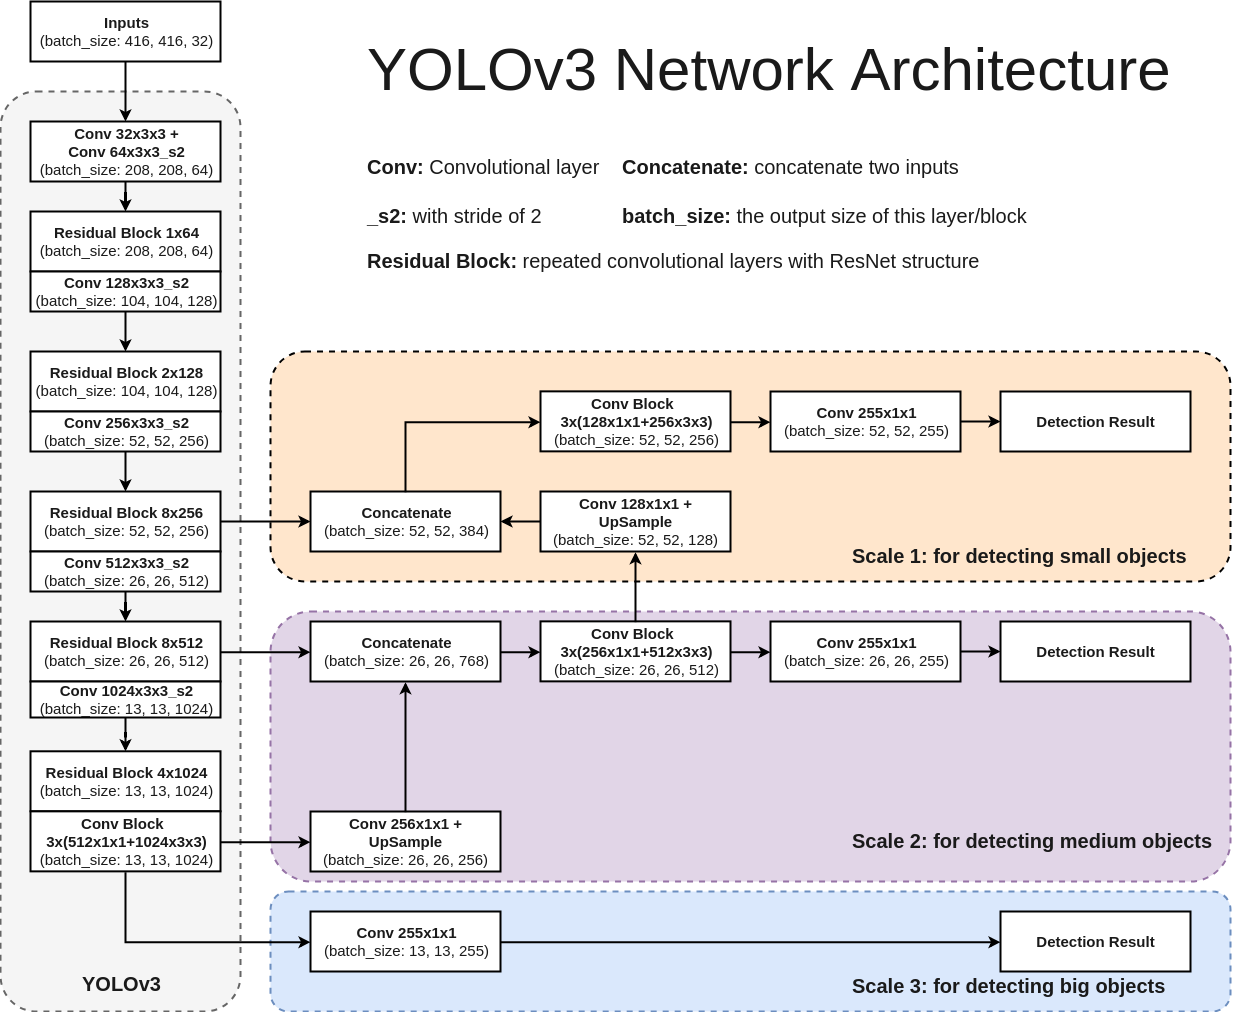

*   What does 85 represent in the last dimension of the prediction box shape?

**Solution**

*   As indicated previously the last dimension (85) of the prediction box indicates the:

    -> pred_bbox[i][:5] - the 4 coordinates of the bounding box (tx, ty, tw, th);

    -> pred_bbox[i][5] - Objectness score (p0), which represents the probability that an object is contained inside a bounding box;

    -> pred_bbox[i][6:] - Class confidence scores ([p1; pc], c=85). These indicate the probabilities of the detected object belonging to a particular class.

Image credits: https://towardsdatascience.com/yolo-v3-object-detection-53fb7d3bfe6b
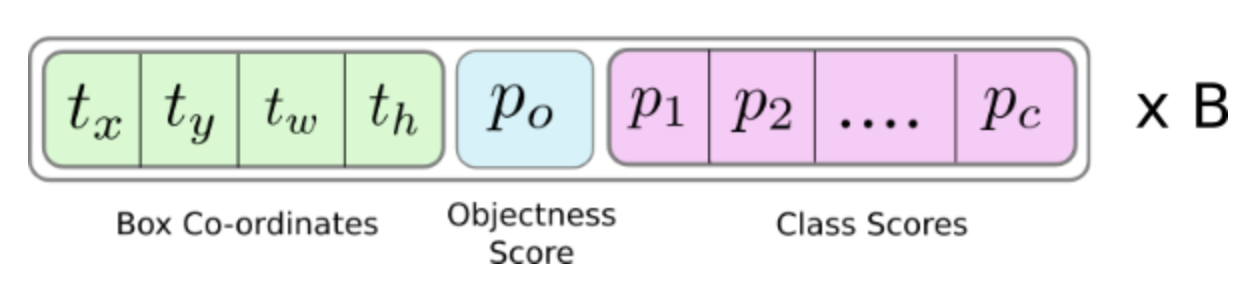



*   What is the aim in having three prediction boxes array?
*   Why is it helpful?

**Solution**

*   The third version of YOLO performs the prediction at three scales, which are precisely given by downsampling the dimensions of the input image. The reason of utilising 3 boxes is to improve the main problems of the previous version: detecting small objects. So, the boxes with the smallest dimensions detect large objects, (1, 13, 13, 3, 85), while medium dimensions, (1, 26, 26, 3, 85), detect medium objects and, finally, the bigger dimensions are responsible for detecting the smalles objects, (1, 52, 52, 3, 85). This way, the upsampled layers concatenated with the previous layers help preserve the fine-grained features which help in detecting small objects.

*   Reshape the prediction boxes

In [ ]:
import tensorflow as tf

pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox]
pred_bbox = tf.concat(pred_bbox, axis=0)

print(pred_bbox.shape)

(10647, 85)


*   What do you think happens in the previous cell (reshaping the prediction boxes)? Explain the code as per your understanding.
*   Why do you think this step is needed?

**Solution**

*   The reshaping of the prediction boxes in the previous cell is a flattening operation where all the vectors, including bounding box coordinates, objectness score and class confidence, are stacked into a single matrix with 10647 rows and 85 columns.

    Following the subsequent denominations defined previously:

    ''The output shape of each box (1, x, y, n, v) corresponds to:

      x -> the width of the cells into which the image is divided;

      y -> the length of the cells into which the image is divided;

      n -> the number of channels (for example, an RGB image contains 3 channels);

      v -> is the concatenation of multiple values of length 85.''

    The dimensions obtained (10647, 85) can be determined as follows:

        pred_bbox.shape[0] = n * (x2*y2 + x1*y1 + x0*y0) = 3 * (13*13 + 26*26 + 52*52) = 10647

        pred_bbox.shape[1] = v = 85

*   In order to combine the boxes into a single matrix, it is fundamental that the shapes match, since tensors with different shapes can't be concatenated directly. This way, it is necessary to flatten in order to merge everything into a single matrix. From that, it is possible to apply detections of each output into the final prediction boxes.

*   What are anchor boxes? What is the significance of anchor boxes in YOLO?

**Solution**

*   Anchor boxes are a set of predefined bounding boxes with defined height and width. These are constructed to capture the size and aspect ratio of the object classes that should be detected. Usually they are selected based on object sizes in the training datasets. During detection, the predefined anchor boxes are tiled across the image. The network predicts the probability and other attributes, such as background, intersection over union (IoU) and offsets for every tiled anchor box. The predictions are used to refine each individual anchor box. You can define several anchor boxes, each for a different object size. Anchor boxes are fixed initial boundary box guesses.

    The network does not directly predict bounding boxes, but rather predicts the probabilities and refinements that correspond to the tiled anchor boxes. The network returns a unique set of predictions for every anchor box defined. The final feature map represents object detections for each class. The use of anchor boxes enables a network to detect multiple objects, objects of different scales, and overlapping objects [Text credits: https://www.mathworks.com/help/vision/ug/anchor-boxes-for-object-detection.html].

*   In terms of significance, the anchor boxes remove the need of scanning images with a sliding window that computes a separate prediction at every potential position, as was performed in previous labs with HOG. The position of an anchor box is determined by mapping the location of the network output back to the input image. This way, as a CNN is able to process the input convolutionally, a spatial position in the input can be related to the output, allowing the extraction of all the features at once, making real-time object detection systems possible.

*   Post process the prediction bounding boxes

In [ ]:
from yolov3.utils import postprocess_boxes

score_threshold = 0.3

bboxes = postprocess_boxes(pred_bbox, image, YOLO_INPUT_SIZE, score_threshold)

In [ ]:
len(bboxes)

21

*   What is score threshold? What is the role of score threshold?

**Solution**

*   In this algorithm, it is performed an objectness score per bounding box through logistic regression, with a value of 1 if the bounding box prior overlaps a ground truth object by more than any other bounding box prior. If the bounding box prior is not the best but does overlap a ground truth object by more than some threshold we can ignore the prediction.

    For this purpose, it is necessary to use a threshold, between 0 and 1, in order to filter the bounding boxes that do not describe an object confidently.  Confidence values over the threshold are considered valid or true identifications while the remaining are excluded. This way, the final results obtained are more trustworthy. 


*   What happens when the score_threshold is low? What happens when it is high?

**Solution**

*   If the value of the threshold is low, then fewer bounding boxes are excluded because the level of confidence required is low (for example 0.3). On the other hand, increased values, like 0.7, it is demanded a significant level of confidence in the identifications. Thus, the number of valid boxes is lower.

### Non-maximum Supression

*   What is non-maximum supression? Why is it needed?
*   What happens in this step?

**Solution**

*   Non-maximum suppression (NMS) is the process of selecting only one box when several boxes overlap and detect the same object.

    Firstly, it is applied the filtering performed by the score threshold described above. However, this approach is not enough, since there are numerous overlaps between boxes. This way, it is defined a second threshold (NMS) to select the right boxes through Intersection over Union (IoU).

*   In order to execute this implementation, the key steps to remove all the boxes with a larger overlap according to the selected box are:

    1. Select the box with the highest score;

    2. Compute its overlap with all other boxes, and remove the ones that overlap it more than the threshold defined;

    3. Return to step 1 and iterate until there are no more boxes with a lower score than the selected box.

    The following image describes the result of the process in an image.

Image credits: https://pylessons.com/YOLOv3-introduction
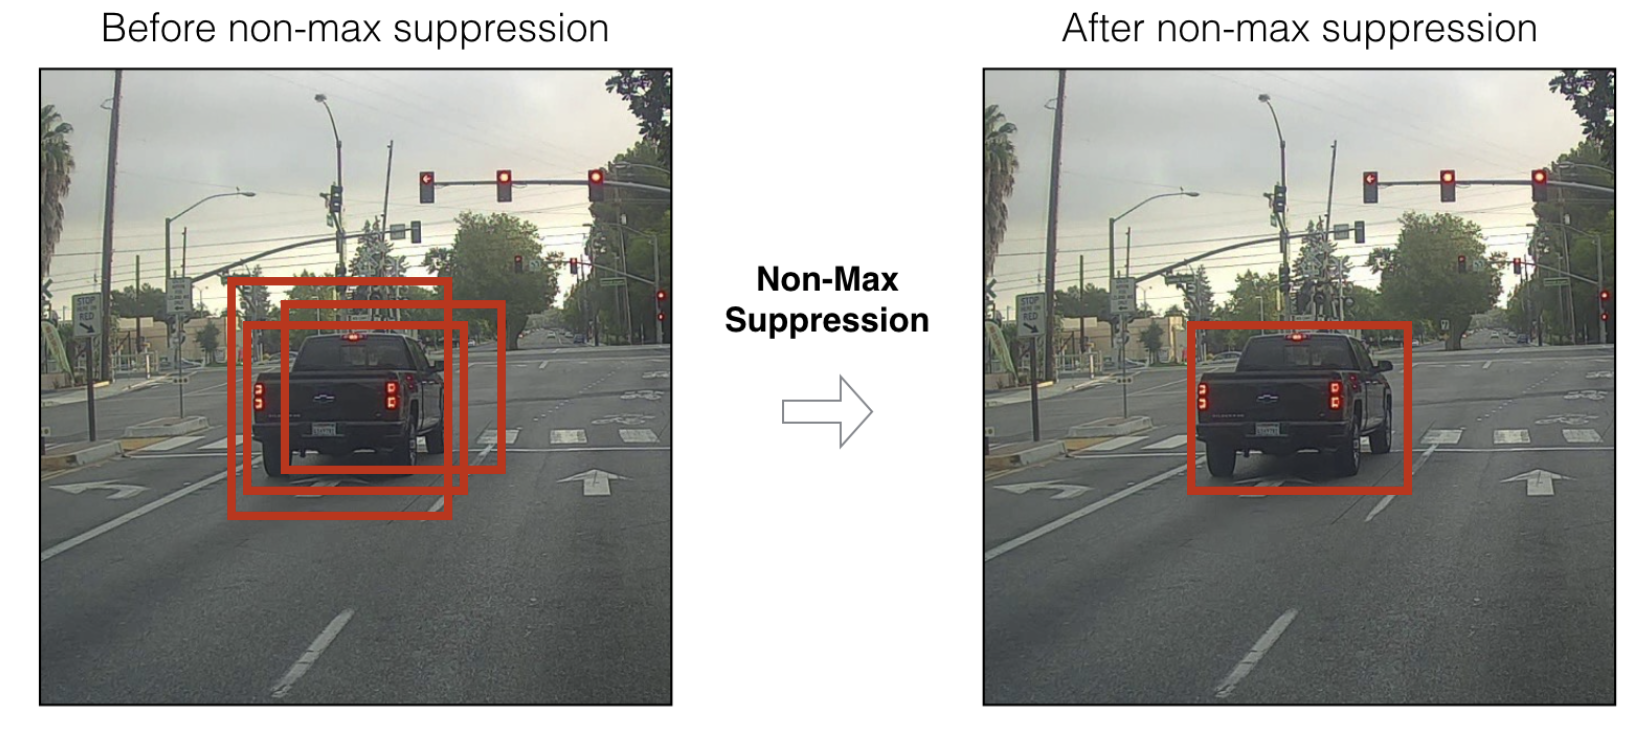



*   Apply NMS on the bounding boxes.

In [ ]:
from yolov3.utils import nms

iou_threshold = 0.45

bboxes = nms(bboxes, iou_threshold, method='nms')

*   What is the role of IoU Threshold? What happens when a IoU higher threshold is used?

**Solution**

*   The IoU threshold is the critical function used by NMS, in order to unify the overlapping boxes that detect the same object, as described above. 

*   Since this approach removes the boxes that overlap the one with the highest score, for lower values fewer boxes are filtered, while for higher more boxes are filtered. In other words, for lower values, more boxes are considered for the unification, while for higher values fewer boxes contribute to this process.

    The following image describes the mathematical process inherent to IoU.

Image credits: https://pylessons.com/YOLOv3-introduction

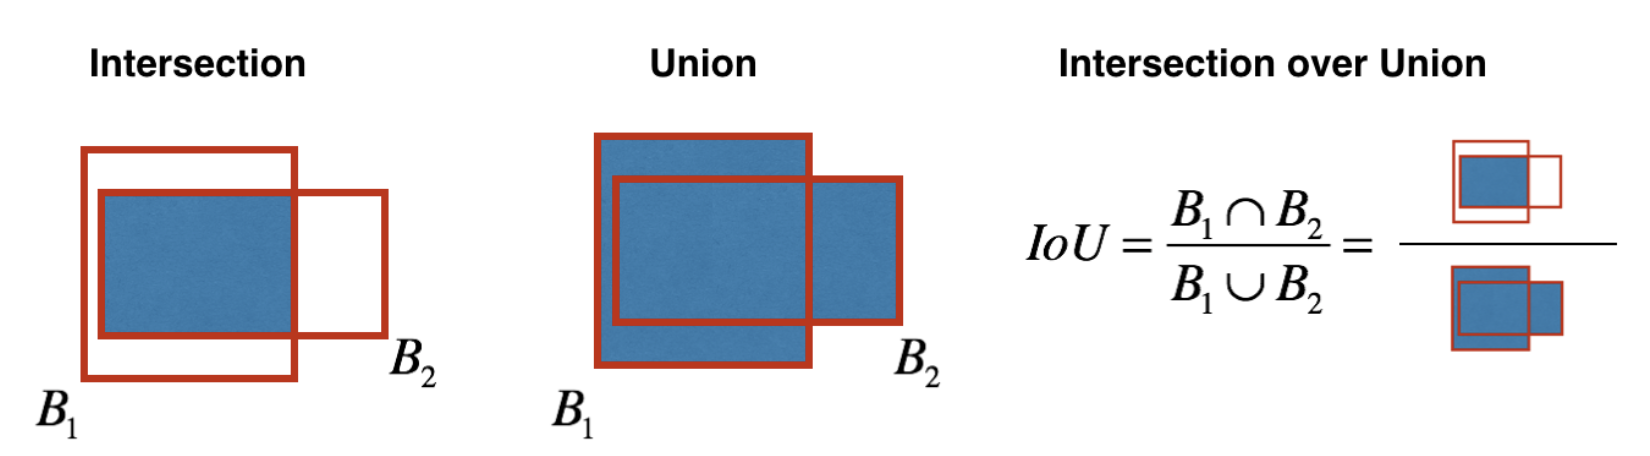

In [ ]:
#  draw the predicted bounding boxes on the image

from yolov3.utils import draw_bbox

pred_image = draw_bbox(image, bboxes, CLASSES=YOLO_COCO_CLASSES, rectangle_colors='')

### Predicting output

*   Visualize the pred_image using matplotlib

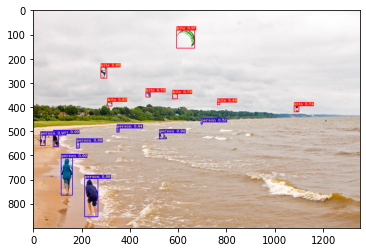

In [ ]:
# solution
plt.imshow(pred_image)


# YOLO training

*   In this exercise, the task is to train mnist dataset using YOLOv3-Tiny model
*   Load the YOLOv3-Tiny weights using any one of the methods
*   For this experiment, we would use MNIST as the training data
*   Please note that all the necessary code is already available in the repo

In [ ]:
# download the weights to the filesystem 
# (Remember that this would not be persistent)

! wget -P model_data https://pjreddie.com/media/files/yolov3-tiny.weights

--2022-11-22 16:49:06--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘model_data/yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  11.6MB/s    in 2.9s    

2022-11-22 16:49:09 (11.6 MB/s) - ‘model_data/yolov3-tiny.weights’ saved [35434956/35434956]



### Prepare data

*   The model takes a long time to train even with GPU. In order to fasten the training process, let us change the number of training and testing images in **mnist/make_data.py** file.
```
images_num_train = 500  # line number 20 in make_data.py
images_num_test = 50  # line number 21 in make_data.py
```
*   PS: 
    *   The dataset is already available in the repository.
    *   The file can be opened by double clicking on the filename from the Files menu.


*   Prepare the dataset for training

In [ ]:
! python mnist/make_data.py

Extracting all train files now...
Done!
Extracting all test files now...
Done!
=> /content/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/mnist/mnist_train/000001.jpg 351,341,373,363,9 269,98,311,140,7 1,98,57,154,0 148,143,204,199,7 59,43,143,127,1 178,304,262,388,6 1,170,85,254,9
=> /content/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/mnist/mnist_train/000002.jpg 81,51,103,73,4 99,291,121,313,6 104,250,118,264,8 315,200,343,228,4 255,171,311,227,4 132,244,244,356,3
=> /content/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/mnist/mnist_train/000003.jpg 299,154,313,168,3 141,57,155,71,1
=> /content/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/mnist/mnist_train/000004.jpg 35,325,49,339,5 32,383,54,405,1 243,26,265,48,0 4,182,32,210,3 43,83,71,111,5 301,191,413,303,8
=> /content/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/mnist/mnist_train/000005.jpg 42,262,56,276,0 186,164,214,192,4 21

### Tensorboard Visualization

*   Tensorboard is a visualization toolkit that allows for tracking and visualizing metrics such as loss and accuracy.
*   We would get introduced to tensorboard visualization here.
*   More information can be seen [here](https://www.tensorflow.org/tensorboard)

In [ ]:
# Load the TensorBoard notebook extension

%load_ext tensorboard

### Train the network

*   Change the following train options in the **configs.py** file in the yolov3 folder
```
TRAIN_YOLO_TINY = True
# Replace the batch size with smaller number if the GPU size is not sufficient 
TRAIN_BATCH_SIZE = 128
# Replace the train epochs with smaller number for faster training
TRAIN_EPOCHS = 50
```



*   Train the model using MNIST dataset

In [ ]:
! python train.py

*   If your tensorboard does not load, try to follow the following gif.

![](https://i.stack.imgur.com/ENl6b.gif)

In [ ]:
# Visualize the training curves
# you can find the different loss curves by selecting custom scalars option
# in the top right drop down

%tensorboard --logdir /content/TensorFlow-2.x-YOLOv3/log/

*   Explain the loss used in YOLOv3

**Solution**

*   In YOLOv3, the loss function used for training is separated into mean squared error for bounding box regression and binary cross-entropy for object classification to help improve detection accuracy. This way, the loss function can be described as:

    1. Localization Loss:

       It is measured the quality of the predicted box location and size, according to the distance between the ground truth centre. Furthermore, to emphasize the boundary box accuracy, the loss is multiplied by the parameter λcoord.

    2. Classification Loss:

       It is measured the quality of the object classification, by calculating the probabilistic difference between every grid and anchor channel that contains a ground truth box.

    3. Confidence Loss:

       It is measured the sensitivity of the detection (TP/TN/FP/FN), according to the IoU and the ground truth. This is based on a weighted MSE, where the loss for the positive cases and the negative cases are computed individually, in order to attenuate the negative cases. Thus, it is performed as compensation for the imbalance in the loss, originated by the presence of more instances of objects not in boxes than the opposite.

### Predicting objects

*   Change the following option in the **detect_mnist.py** 
```
ID = random.randint(0, 50)  # depending on the number of images in test set
```
*   Change the following train options in the **configs.py** 
```
TRAIN_MODEL_NAME = f"{YOLO_TYPE}_custom_Tiny"
```

*   Run the detction script to find the outut

In [ ]:
! python detect_mnist.py

# You will find the predictions file saved in the output path

# Understanding Object Detection

*   What is the latest YOLO version available in literature? From the initial versions to the current version, what differences are made in each version?

**Solution**

*   Nowadays there are many versions of YOLO, such as:
    *   YOLO
    *   YOLOv2
    *   YOLOv3
    *   YOLOv4
    *   YOLOv5
    *   YOLOv6
    *   YOLOv7
    *   YOLOX
    *   YOLOS
    *   YOLOF
    *   YOLOR

    In which the latest updated version corresponds to YOLOv7.
    
    Considering YOLOv2, YOLOv3, YOLOv4, YOLOv5, YOLOv6 and YOLOv7, the main updates relatevelly to the previous version are:

    **YOLOv2:**
    
    In the second version of YOLO the focus relies mainly on the imporvement of the recall and localization while maintaining classiﬁcation accuracy, with the jelp of:

    -> BatchNormalization: By adding batch normalization on all of the convolutional layers in YOLO they get more than 2% improvement in mAP.

    -> High Resolution Classiﬁer: YOLO V2 divides pre-training into two steps: from the beginning, train the network with 224×224 (160 epochs) pixels, then adjust the pixels to 448×448 and train for ten epochs.

    -> Multi-scale training: that allowed the network to predict at varying input sizes, thus allowing a trade-off between speed and accuracy.

    **YOLOv3:**
    
    Compared with YOLO V2, YOLO V3 has two points: using multi-scale features for object detection and adjusting the basic network structure.

    On the one hand, YOLO V3 adopts feature graphs of three scales (when the input is (416×416), (13×13), (26×26) and (52×52)). YOLO V3 uses three prior boxes for each position, so K-means is used to get nine prior boxes and divide them into three scale feature maps. Feature maps with larger-scale use smaller prior boxes.

    On the other hand, YOLO V3 feature extraction network used the residual model. Compared with Darknet- 19 used by YOLO V2, it contained 53 convolution layers, so it was called Darknet-53.[Text credits: Jiang, P.; et al. (2020/2021). A Review of Yolo Algorithm Developments]

    **YOLOv4:**
    
    YOLO V4 style has a significant change, more focus on comparing data, and has a substantial improvement.

    The integrator characterizes it and finally achieves very high performance.
We can summarize it like this: YOLO V4=CSP Darknet53+SPP+Pan+YOLO V3 The main contributions are as follows:

    -> An efficient and powerful target detection model is proposed. It allows everyone to train super-fast and accurate target detectors;

    -> The influence of SOTA's bag-of-freebies and bag-of-specials methods was verified during detector training;

    -> Improved SOTA methods to make them more efficient and suitable for single GPU training, including CBN, PAN, SAM, etc.[Text credits: Jiang, P.; et al. (2020/2021). A Review of Yolo Algorithm Developments]

    **YOLOv5:**
    
    Multiple network architectures of YOLO V5 are more flexible to use, have a very lightweight model size, and are on par with the YOLO V4 benchmark in terms of accuracy. However, people still have reservations about YOLO V5 because it is less innovative than YOLO V4, but it has some performance improvements, with the following significant advantages:

    -> The PyTorch framework is user-friendly and easy to train your data set, making it easier to put into production than the Darknet framework used in YOLO V4;

    -> Easy to read code, integration of a large number of computer vision technology, is conducive to learning and reference;

    -> Easy to configure the environment, model training is very fast, and batch reasoning produces real-time results.

    YOLO V5 provides each batch of training data through the data loader and enhances the training data simultaneously. The data loader performs three types of data enhancement: scaling, color space adjustment, and mosaic enhancement. [Text credits: Jiang, P.; et al. (2020/2021). A Review of Yolo Algorithm Developments]

    **YOLOv6:**
    
    Unlike the previous YOLO architectures, which use anchor-based methods for object detection, YOLOv6 opts for the anchor-free method. 

    This makes YOLOv6 51% faster compared to most anchor-based object detectors. This is possible because it has 3 times fewer predefined priors.

    YOLOv6 uses the EfficientRep backbone consisting of RepBlock, RepConv, and CSPStackRep blocks. 

    Further, YOLOv6 uses VFL and DFL as loss functions for classification and box regression, respectively.[Text credits: https://learnopencv.com/yolov6-object-detection/#What’s-New-in-YOLOv6?]

    **YOLOv7:**
    
    YOLOv7 improves speed and accuracy by introducing several architectural reforms. Similar to Scaled YOLOv4, YOLOv7 backbones do not use ImageNet pre-trained backbones. Rather, the models are trained using the COCO dataset entirely. The similarity can be expected because YOLOv7 is written by the same authors as Scaled YOLOv4, which is an extension of YOLOv4. The following major changes have been introduced in the YOLOv7 paper. We will go through them one by one.

    Architectural Reforms:

      -> E-ELAN (Extended Efficient Layer Aggregation Network)

      -> Model Scaling for Concatenation-based Models 

    Trainable BoF (Bag of Freebies):

      -> Planned re-parameterized convolution

      -> Coarse for auxiliary and Fine for lead loss [Text credits: https://learnopencv.com/yolov7-object-detection-paper-explanation-and-inference/#What’s-new-in-YOLOv7?]

*   What are the other object detection frameworks available in the literature? 
*   How different are they compared with YOLO?

**Solution**

*   Other object detection frameworks available are R-CNN, Fast R-CNN, Faster R-CNN, Mask R-CNN, SSD, RetinaNet and others. The main configurations and differences are the following:

*   R-CNN/Fast R-CNN/Faster R-CNN/Mask R-CNN

    1. A convolutional feature map is obtained after the input image passes through the full CNN;

    2. Region Proposal Network (RPN) are included in order to detect bounding boxes from windows of the convolutional feature map;

    3. Uses 9 anchors (3 scales and 3 aspect ratios) to predict the correction coordinates;

    4. A Region of Interest (RoI) layer extracts a fixed-length feature vector and uses it to retrieve the final bounding box and the probability of the object classes.

*   Single Shot MultiBox Detector (SSD)

    1. An End-to-End CNN model (a series of convolutional layers) generates candidate bounding boxes from different scales along the way;

    2. Performs NMS like YOLO, but applies Hard Negative Mining which is a method to pick only the negative examples (non-overlapping bounding boxes that do not contain objects) with the highest confidence loss, so that the ratio between the positives (labelled objects) and the negatives is at most 1:3;

    3. The Key difference between training SSD and training a typical detector that uses region proposals is that ground truth information needs to be assigned to specific outputs in the fixed set of detector outputs;

    3. Finally, SSD is very sensitive to the bounding box size.

*   RetinaNet

    1. Is a one-stage framework like YOLO or SSD which aspires for a speed-accuracy trade-off opposed to two-stage frameworks like R-CNNs

    2. ResNet + FPN (Feature Pyramid Network) backbone is to generate a multi-scale convolutional feature pyramid

    3. Uses a class discriminator and another subset to predict the location of the bounding boxes from the anchor boxes.

    4. To improve the imbalance of classes during training, it includes a focal loss.

*    What is the underlying algorithm behind YOLO? Explain each stage briefly.

**Solution**

*   YOLO learns a generalizable representation of objects and works accordingly with the following techniques:

    1. Residual blocks;
    2. Bounding box regression;
    3. Intersection Over Union (IOU).


*   Briefly, in general, YOLO follows the following steps:

    1. Receives the input image and divides it into grids;
    2. Creates bounding boxes and predict the confidence value per box;
    3. In each cell, predicts the class probability;
    4. Multiplication between the confidence value and the class probability;
    5. Selects the best prediction using non-maximum suppression.

*   Explain the network architecture used in training YOLO

**Solution**

*   The architecture of YOLOV3 has the following specifications:

    1. Firstly, the third version of YOLO uses a variant of Darknet, which originally has 53 layer network trained on Imagenet;
    2. For the detection task, 53 more layers are stacked onto it, resulting in 106 layer fully convolutional underlying the architecture;
    3. The detection is performed by applying 1 x 1 detection kernels on feature maps of three different sizes at three different places in the network;
    4. The shape of detection kernel is 1 x 1 x (B x (5 + C)), where B is the number of bounding boxes a cell on the feature map can predict, '5' is for the 4 bounding box attributes and one object confidence and, finally, C is the number of classes;
    5. Last, this version uses binary cross-entropy for calculating the classification loss for each label while object confidence and class predictions are predicted through logistic regression.
   
*   The Hyper-parameters of the algorithms already explained priorly are:

    1. Class Threshold - Defines probability threshold for the predicted object;
    2. Non-Max suppression Threshold - It helps overcome the problem of detecting an object multiple times in an image. It does this by taking boxes with maximum probability and suppressing the close-by boxes with non-max probabilities (less than the predefined threshold);
    3. Input height and shape - Size of the input image.

*   The following image illustrates the diagram explained.

Image Credits: https://dev.to/afrozchakure/all-you-need-to-know-about-yolo-v3-you-only-look-once-e4m

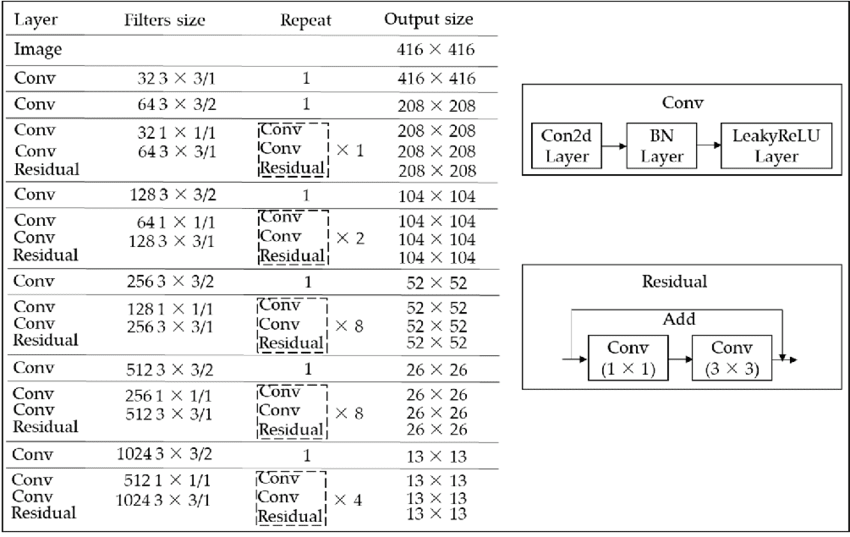


*   What are the drawbacks in object detection frameworks?

**Solution**

*   The main drawbacks related to object detection frameworks are:

    1. Speed in real-tim detection;
    2. Not balanced classes, with more negative examples than positive;
    3. Poor results with small objecs;
    4. Large and complex models to train;
    5. Affected by artificial factors;
    6. Datasets might be harder to acquire.



---

# **End of P4_2: Object Detection with YOLO**
Deadline for P4_2 submission in CampusVirtual is: **Thursday, the 1st of December, 2022**